In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [ ]:
import plotly.offline as pyoff
import plotly.graph_objs as go

# Data

In [ ]:
retail_df = pd.read_csv('data/OnlineRetail.csv', parse_dates=['InvoiceDate'], encoding='unicode_escape')
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print('retail_df has {} rows and {} columns'.format(retail_df.shape[0], retail_df.shape[1]))

retail_df has 541909 rows and 8 columns


In [ ]:
# missing values
retail_df.isna().sum()/retail_df.shape[0]

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002683
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
Country        0.000000
dtype: float64

# North star metric: monthly revenue
- Revenue = active customer count * order count * average revenue per order

In [ ]:
# create InvoiceYearMonth
# 100*retail_df['InvoiceDate'].dt.year + retail_df['InvoiceDate'].dt.month
retail_df['InvoiceYearMonth'] = retail_df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

In [ ]:
# create Revenue
retail_df['Revenue'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [ ]:
# monthly_total_revenue
## method 1: groupby
monthly_total_revenue = retail_df.groupby(['InvoiceYearMonth'])['Revenue'].sum()
monthly_total_revenue = monthly_total_revenue.reset_index()
monthly_total_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,748957.020
1,201101,560000.260
2,201102,498062.650
3,201103,683267.080
4,201104,493207.121


In [ ]:
## method 2: resamble
# retail_df.resample('M', on='InvoiceDate').sum()

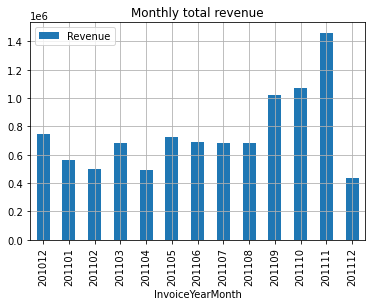

In [ ]:
# plot monthly_total_revenue
monthly_total_revenue.plot(x='InvoiceYearMonth', y='Revenue', kind='bar', grid=True, title='Monthly total revenue')
plt.show()

## Monthly revenue growth rate

In [ ]:
# pct_change
monthly_total_revenue['MonthlyGrowth'] = monthly_total_revenue['Revenue'].pct_change()
monthly_total_revenue.head()

,InvoiceYearMonth,Revenue,MonthlyGrowth
0,201012,748957.020,NaN
1,201101,560000.260,-0.252293
2,201102,498062.650,-0.110603
3,201103,683267.080,0.371850
4,201104,493207.121,-0.278163


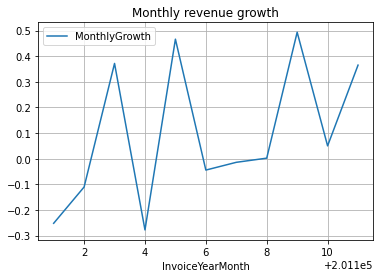

In [ ]:
# plot pct_change
monthly_total_revenue[:-1].plot(x='InvoiceYearMonth', y='MonthlyGrowth', kind='line', grid=True, title='Monthly revenue growth')
plt.show()

# Monthly active customers
- number of unique CustomerIDs by month

In [ ]:
# UK retail_df
retail_UK_df = retail_df[retail_df['Country']=='United Kingdom']
retail_UK_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [ ]:
print('retail_UK_df has {} rows and {} columns'.format(retail_UK_df.shape[0], retail_UK_df.shape[1]))

retail_UK_df has 495478 rows and 10 columns


In [ ]:
# monthly_active_customers
# retail_UK_df.groupby(['InvoiceYearMonth'])['CustomerID'].unique()
monthly_active_customers = retail_UK_df.groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
monthly_active_customers = monthly_active_customers.reset_index()
monthly_active_customers.head()

,InvoiceYearMonth,CustomerID
0,201012,871
1,201101,684
2,201102,714
3,201103,923
4,201104,817


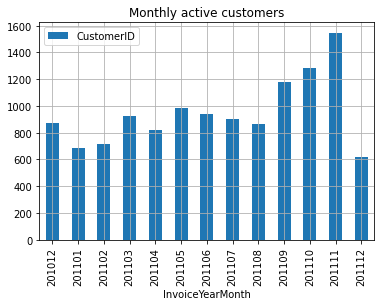

In [ ]:
# plot monthly_active_customers
monthly_active_customers.plot(x='InvoiceYearMonth', y='CustomerID', kind='bar', grid=True, title='Monthly active customers')
plt.show()

# Monthly order count
- count of order by month

In [ ]:
# monthly_total_orders
monthly_total_orders = retail_UK_df.groupby(['InvoiceYearMonth'])['Quantity'].count()
monthly_total_orders = monthly_total_orders.reset_index()
monthly_total_orders.head()

,InvoiceYearMonth,Quantity
0,201012,40125
1,201101,31900
2,201102,25368
3,201103,33483
4,201104,28038


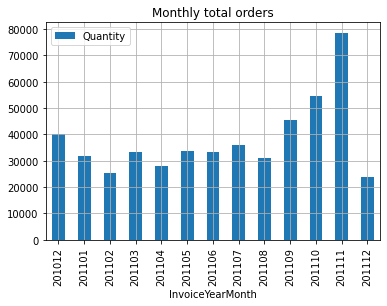

In [ ]:
# plot monthly_total_orders
monthly_total_orders.plot(x='InvoiceYearMonth', y='Quantity', kind='bar', grid=True, title='Monthly total orders')
plt.show()

# Monthly average revenue per order

In [ ]:
# monthly_average_revenue
monthly_average_revenue = retail_UK_df.groupby(['InvoiceYearMonth'])['Revenue'].mean()
monthly_average_revenue = monthly_average_revenue.reset_index()
monthly_average_revenue.head()

,InvoiceYearMonth,Revenue
0,201012,16.865860
1,201101,13.614680
2,201102,16.093027
3,201103,16.716166
4,201104,15.773380


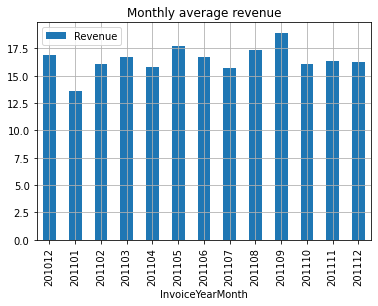

In [ ]:
# plot monthly_average_revenue
monthly_average_revenue.plot(x='InvoiceYearMonth', y='Revenue', kind='bar', grid=True, title='Monthly average revenue')
plt.show()

=> in April 2011: slow-down observed in every metric affecting the North star (monthly revenue):
- active customers
- orders
- revenue per order

# New customer ratio
- find first purchase date
- define new customer: InvoiceYearMonhth = MinPurchaseYearMonth

In [ ]:
# first_purchase_date
first_purchase_date = retail_UK_df.groupby(['CustomerID'])['InvoiceDate'].min()
first_purchase_date = first_purchase_date.reset_index()
first_purchase_date.columns = ['CustomerID', 'MinPurchaseDate']
first_purchase_date.head()

,CustomerID,MinPurchaseDate
0,12346.0,2011-01-18 10:01:00
1,12747.0,2010-12-05 15:38:00
2,12748.0,2010-12-01 12:48:00
3,12749.0,2011-05-10 15:25:00
4,12820.0,2011-01-17 12:34:00


In [ ]:
# create MinPurchaseYearMonth
first_purchase_date['MinPurchaseYearMonth'] = first_purchase_date['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)
first_purchase_date.head()

,CustomerID,MinPurchaseDate,MinPurchaseYearMonth
0,12346.0,2011-01-18 10:01:00,201101
1,12747.0,2010-12-05 15:38:00,201012
2,12748.0,2010-12-01 12:48:00,201012
3,12749.0,2011-05-10 15:25:00,201105
4,12820.0,2011-01-17 12:34:00,201101


In [ ]:
# merge with retail_UK_df
retail_UK_df = pd.merge(retail_UK_df, first_purchase_date, on='CustomerID')
retail_UK_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012


In [ ]:
# create UserType
## 'Existing' if InvoiceYearMonth > MinPurchaseYearMonth
retail_UK_df['UserType'] = 'New'
retail_UK_df.loc[retail_UK_df['InvoiceYearMonth'] > retail_UK_df['MinPurchaseYearMonth'], 'UserType'] = 'Existing'
retail_UK_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,MinPurchaseDate,MinPurchaseYearMonth,UserType
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30,2010-12-01 08:26:00,201012,New
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00,2010-12-01 08:26:00,201012,New
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34,2010-12-01 08:26:00,201012,New


In [ ]:
retail_UK_df['UserType'].value_counts()

Existing    256114
New         105764
Name: UserType, dtype: int64

In [ ]:
# monthly_revenue_usertype
monthly_revenue_usertype = retail_UK_df.groupby(['InvoiceYearMonth', 'UserType'])['Revenue'].sum()
monthly_revenue_usertype = monthly_revenue_usertype.reset_index()
monthly_revenue_usertype.head()

,InvoiceYearMonth,UserType,Revenue
0,201012,New,483799.74
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00


In [ ]:
# filter
## method 1: loc
# monthly_revenue_usertype.loc[(monthly_revenue_usertype['InvoiceYearMonth'] != 201012) & (monthly_revenue_usertype['InvoiceYearMonth'] != 201112)]
## method 2: query
monthly_revenue_usertype = monthly_revenue_usertype.query('InvoiceYearMonth > 201012 and InvoiceYearMonth < 201112')
monthly_revenue_usertype.head()

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.51
2,201101,New,156705.77
3,201102,Existing,220994.63
4,201102,New,127859.00
5,201103,Existing,296350.03


In [ ]:
# plotly
# import plotly.offline as pyoff
# import plotly.graph_objs as go

plot_data = [
    go.Scatter(
        x=monthly_revenue_usertype.query('UserType == "Existing"')['InvoiceYearMonth'],
        y=monthly_revenue_usertype.query('UserType == "Existing"')['Revenue'],
        name='Existing'
    ),
    go.Scatter(
        x=monthly_revenue_usertype.query('UserType == "New"')['InvoiceYearMonth'],
        y=monthly_revenue_usertype.query('UserType == "New"')['Revenue'],
        name='New'
    )
]

plot_layout = go.Layout(
    xaxis={'type': 'category'},
    title='New vs Existing'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

## New customer ratio = new customers / existing customers (by month)

In [ ]:
# new_customer_ratio 
# retail_UK_df.loc[retail_UK_df['UserType'] == 'New'].groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
new_user = retail_UK_df.query('UserType == "New"').groupby(['InvoiceYearMonth'])['CustomerID'].nunique()
existing_user = retail_UK_df.loc[retail_UK_df['UserType'] == 'Existing'].groupby(['InvoiceYearMonth'])['CustomerID'].nunique()

new_customer_ratio = new_user/existing_user
new_customer_ratio = new_customer_ratio.reset_index()
new_customer_ratio.head()

,InvoiceYearMonth,CustomerID
0,201012,NaN
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166


In [ ]:
# drop na
new_customer_ratio = new_customer_ratio.dropna()
new_customer_ratio.head()

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793


In [ ]:
# plotly
# import plotly.offline as pyoff
# import plotly.graph_objs as go

plot_data = [
    go.Bar(
        x=new_customer_ratio.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'],
        y=new_customer_ratio.query('InvoiceYearMonth < 201112')['CustomerID']
    )
]

plot_layout = go.Layout(
    xaxis={'type': 'category'},
    title='New customer ratio'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Retention rate

## Retention rate = retained customers from prev. month / total active customers
- identity which user is active by looking at their revenue per month
- make retention table: pd.crosstab()
- calculate retained customer count (from prev. month) and total customer count
- calculate retention rate

In [ ]:
# purchase_user
purchase_user = retail_UK_df.groupby(['CustomerID', 'InvoiceYearMonth'])['Revenue'].sum()
purchase_user = purchase_user.reset_index()
purchase_user.head()

,CustomerID,InvoiceYearMonth,Revenue
0,12346.0,201101,0.00
1,12747.0,201012,706.27
2,12747.0,201101,303.04
3,12747.0,201103,310.78
4,12747.0,201105,771.31


In [ ]:
# retention table: which customer is active on each month
retention = pd.crosstab(purchase_user['CustomerID'], purchase_user['InvoiceYearMonth'])
retention = retention.reset_index()
retention.head()

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
# calculate RetainedUserCount and TotalUserCount
## method: create an array of dictionaries that keeps retained and total user counts for each month
## retained user: user that is active in both prev and current months
months = retention.columns[1:]
retention_array = []
for i in range(len(months)-1): # only loop through the element before last element
    retention_dict = {}
    selected_month = months[i+1]
    prev_month = months[i]
    retention_dict['InvoiceYearMonth'] = int(selected_month)
    retention_dict['TotalUserCount'] = retention[selected_month].sum()
    retention_dict['RetainedUserCount'] = retention.loc[(retention[prev_month] > 0) & (retention[selected_month] > 0)][selected_month].sum()
    retention_array.append(retention_dict)

## convert to retention df
retention = pd.DataFrame(data=retention_array)
retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount
0,201101,684,322
1,201102,714,263
2,201103,923,305
3,201104,817,310
4,201105,985,369


In [ ]:
# Calculate RetentionRate
retention['RetentionRate'] = retention['RetainedUserCount']/retention['TotalUserCount']
retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate
0,201101,684,322,0.470760
1,201102,714,263,0.368347
2,201103,923,305,0.330444
3,201104,817,310,0.379437
4,201105,985,369,0.374619


In [ ]:
# plotly
# import plotly.offline as pyoff
# import plotly.graph_objs as go
plot_data = [
    go.Scatter(
        x=retention.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'],
        y=retention.query('InvoiceYearMonth < 201112')['RetentionRate'],
        name='organic'
    )
]

plot_layout = go.Layout(
    xaxis={'type': 'category'},
    title='Monthly Retention Rate'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

# Churn rate

## Churn rate = 1 - Retention rate

In [ ]:
# Calculate ChurnRate
retention['ChurnRate'] = 1 - retention['RetentionRate']
retention.head()

,InvoiceYearMonth,TotalUserCount,RetainedUserCount,RetentionRate,ChurnRate
0,201101,684,322,0.470760,0.529240
1,201102,714,263,0.368347,0.631653
2,201103,923,305,0.330444,0.669556
3,201104,817,310,0.379437,0.620563
4,201105,985,369,0.374619,0.625381


In [ ]:
# plotly
# import plotly.offline as pyoff
# import plotly.graph_objs as go
plot_data = [
    go.Scatter(
        x=retention.query('InvoiceYearMonth < 201112')['InvoiceYearMonth'],
        y=retention.query('InvoiceYearMonth < 201112')['ChurnRate'],
        name='organic'
    )
]

plot_layout = go.Layout(
    xaxis={'type': 'category'},
    title='Monthly Churn Rate'
)

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)